# The Avenger Classifier 💫

#### Face Detection using Haar Cascades

<br>

<img src="https://wallpaperaccess.com/full/13453.jpg" width=800>

This project classifies the faces of the 5 following Avengers:
- Chris Evans 
- Chris Hemsworth
- Robert Downey Jr.
- Scarlett Johansson 
- Tom Holland 


---


In [94]:
# Import needed modules
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<br>

### 1. Detecting face and eyes

First, we try reading a test image using the`imread` function from the `cv2` module.

In [95]:
# output: (width, height, rgb value)

img = cv2.imread('test_images/scarlett.jpeg')
img.shape

(3000, 1750, 3)

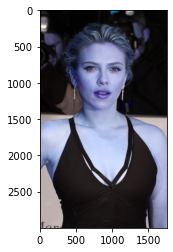

In [96]:
plt.imshow(img)

<br>

**Then, we convert the image to grayscale using the `cvtColor` function.**

In [97]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray.shape

(3000, 1750)

In [98]:
gray

array([[  4,   4,   3, ...,   8,   6,   7],
       [  5,   4,   4, ...,   6,   5,   9],
       [  1,   2,   3, ...,   4,   4,   9],
       ...,
       [144, 149, 148, ..., 171, 172, 168],
       [149, 150, 151, ..., 171, 170, 170],
       [162, 152, 150, ..., 169, 166, 173]], dtype=uint8)

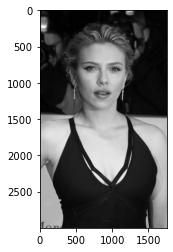

In [99]:
# print out the gray image
plt.imshow(gray, cmap="gray")

**Create a face and eye detector with OpenCV.**

In [100]:
face_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_eye.xml")

<br>

**Now we try to detect the face on the image - `gray` we just created above.**

`detectMultiScale` - Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [101]:
# returns an array of of detected faces, each with (x, y, width, height) 

faces = face_cascade.detectMultiScale(gray, 1.3, 5)  # (img, scaleFactor, minNeighbors)

faces

array([[460, 493, 810, 810]], dtype=int32)

In [102]:
(x,y,w,h) = faces[0]
x,y,w,h

(460, 493, 810, 810)

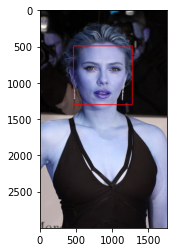

In [103]:
# draws a red rectangle that indicates the face region

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

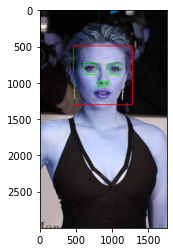

In [104]:
cv2.destroyAllWindows()

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),10)      # draws red rectangle for face
    
    roi_gray = gray[y:y+h, x:x+w]       # cropped detected face in grayscale
    roi_color = face_img[y:y+h, x:x+w]  # cropped detected face in color
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),10) # draw green rectangles for eyes

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### 2. Cropping the facial region of the image

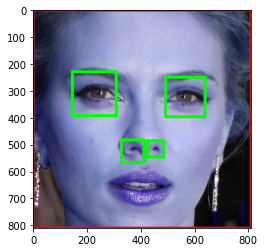

In [105]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

<br>

### 3. Write and test a function that combines step 1 and 2

We write a function called `get_cropped_image` that takes in an image path and transforms ONE input image to a cropped image with only the face region IF the face is visible and at least 2 eyes are detected.

If the two conditions fail, then nothing is returned.

In [115]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # return cropped img in color if at least 2 eyes are detected
        if len(eyes) >= 2:      
            return roi_color

<br>

Test the function on another image in the `test_image` folder named `tom.jpeg`.

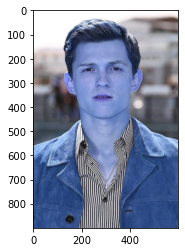

In [121]:
# prints orignal image
tom = cv2.imread("test_images/tom.jpeg")
plt.imshow(tom)

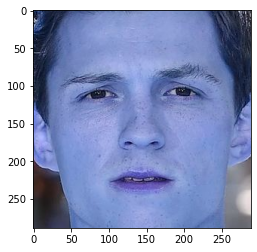

In [122]:
# prints cropped image
tom_cropped = get_cropped_image("test_images/tom.jpeg")
plt.imshow(tom_cropped)

<br>

Now, let us test the function on another image of Tom Holland with his face at an angle. This time, no cropped image should be returned!

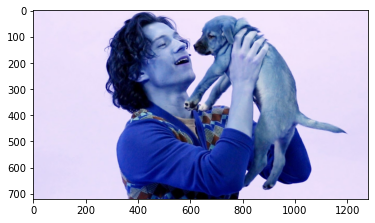

In [123]:
# prints original image
tom_side = cv2.imread("test_images/tom_side.jpeg")
plt.imshow(tom_side)

In [125]:
# prints cropped image
tom_side_cropped = get_cropped_image("test_images/tom_side.jpeg")
tom_side_cropped    # nothing is returned indeed!

<br>

### 4. Process all Avenger images in the `dataset` folder

Using the `os` module, we create a list called `img_dirs` that contains paths to each individual Avenger's images folder.

In [144]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [145]:
import os

img_dirs = []

# go through all sub-directories in the dataset folder 
# and store their path in img_dirs

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['./dataset/robert_downey_jr',
 './dataset/croppedrobert_downey_jr',
 './dataset/chris_hemsworth',
 './dataset/chris_evans',
 './dataset/croppedchris_hemsworth',
 './dataset/cropped',
 './dataset/scarlett_johansson',
 './dataset/.ipynb_checkpoints',
 './dataset/tom_holland']

<br>

Create a folder called `cropped` inside the `dataset` folder (if one already exists, remove it and create a new one)

In [146]:
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)    # remove existing folder
    
os.mkdir(path_to_cropped_data)             # create new folder

<br>

Create a list called `cropped_image_dirs` that contains the cropped images folder for each Avenger. Then, create a dictionary called `avenger_file_names_dict` that will have key: avenger name and value: list of image file paths

In [147]:
cropped_image_dirs = []
avenger_file_names_dict = {}

<br>



In [148]:
for img_dir in img_dirs:
    count = 1                                   # initialize count for file name
    avenger_name = img_dir.split('/')[-1]       # taking the last element of the list
    print(avenger_name)
    
    avenger_file_names_dict[avenger_name] = []  # set value of avenger name key to an empty array
    
    # for each image in an avenger folder
    for entry in os.scandir(img_dir):     
        roi_color = get_cropped_image(entry.path)
        
    # if the img's face and eyes are visible
        if roi_color is not None:         
            cropped_folder = path_to_cropped_data + avenger_name
            
    # create a cropped folder for that avenger if it doesn't exist already
            if not os.path.exists(cropped_folder):  
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
        
            cropped_file_name = avenger_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            avenger_file_names_dict[avenger_name].append(cropped_file_path)
            count += 1

robert_downey_jr
Generating cropped images in folder:  ./dataset/cropped/robert_downey_jr
croppedrobert_downey_jr
Generating cropped images in folder:  ./dataset/cropped/croppedrobert_downey_jr
chris_hemsworth
Generating cropped images in folder:  ./dataset/cropped/chris_hemsworth


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
